In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [2]:
# Load CSV files
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

# Separate features and labels
x_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

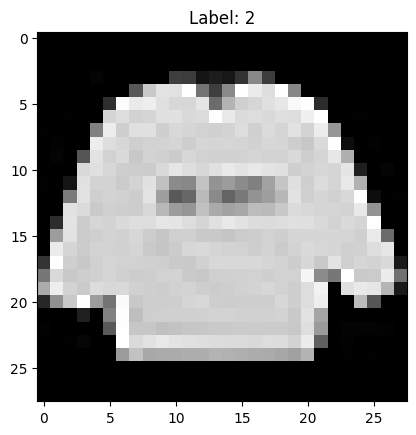

In [3]:
# Display an image
image_data = train_df.iloc[0, 1:].values  
image_data = image_data.reshape(28, 28)

plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {train_df.iloc[0, 0]}")
plt.show()

In [4]:
# Create a sequential model
model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(96, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │       221,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,666 (901.04 KB)

 Trainable params: 230,666 (901.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7364 - loss: 0.7445 - val_accuracy: 0.8742 - val_loss: 0.3400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8575 - loss: 0.4006 - val_accuracy: 0.8908 - val_loss: 0.2948
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8742 - loss: 0.3506 - val_accuracy: 0.9018 - val_loss: 0.2705
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8868 - loss: 0.3151 - val_accuracy: 0.9044 - val_loss: 0.2619
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8929 - loss: 0.2925 - val_accuracy: 0.9102 - val_loss: 0.2451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9027 - loss: 0.2674 - val_accuracy: 0.9053 - val_loss: 0.2530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.2579 - val_accuracy: 0.9182 - val_loss: 0.2317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9126 - loss: 0.2379 - 

In [10]:
# Plot the training and validation accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))), y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig.update_layout(title='Training and Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig.show()

# Plot the training and validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Training and Validation Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9188 - loss: 0.2247
Test loss: 0.21864348649978638
